# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

PG Diploma in Machine Learning and AI from IIIT Bangalore | Upgrad
Developed by:
1. Arjun Shome - Group facilitator

Deep Learning Course Project - Gesture Recognition
Problem Statement
Imagine you are working as a data scientist at a home electronics company which manufactures state of the art smart televisions. You want to develop a cool feature in the smart-TV that can recognise five different gestures performed by the user which will help users control the TV without using a remote.

The gestures are continuously monitored by the webcam mounted on the TV. Each gesture corresponds to a specific command:

Gesture	Corresponding Action
Thumbs Up	Increase the volume.
Thumbs Down	Decrease the volume.
Left Swipe	'Jump' backwards 10 seconds.
Right Swipe	'Jump' forward 10 seconds.
Stop	Pause the movie.
Each video is a sequence of 30 frames (or images).

Objectives:
Generator: The generator should be able to take a batch of videos as input without any error. Steps like cropping, resizing and normalization should be performed successfully.

Model: Develop a model that is able to train without any errors which will be judged on the total number of parameters (as the inference(prediction) time should be less) and the accuracy achieved. As suggested by Snehansu, start training on a small amount of data and then proceed further.

Write up: This should contain the detailed procedure followed in choosing the final model. The write up should start with the reason for choosing the base model, then highlight the reasons and metrics taken into consideration to modify and experiment to arrive at the final model.

In [20]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import os
from skimage.transform import resize
from imageio import imread
import matplotlib.pyplot as plt
import datetime
import os
import math



We set the random seed so that the results don't vary drastically.

In [5]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [6]:
train_doc = np.random.permutation(open('/home/arjun/Downloads/Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('/home/arjun/Downloads/Project_data/val.csv').readlines())
batch_size = 10

In [7]:
x = 30
y = 120
z = 120
input_shape = (x,y,z,3)

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [8]:
def generator(source_path, folder_list, batch_size):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = [x for x in range(0,x)]
    while True:
        t = np.random.permutation(folder_list)
        num_batches = math.floor(len(folder_list)/batch_size)
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    resized_img = resize(image,(120,120))

                    batch_data[folder,idx,:,:,0] = resized_img[:,:,0]/255
                    batch_data[folder,idx,:,:,1] = resized_img[:,:,1]/255
                    batch_data[folder,idx,:,:,2] = resized_img[:,:,2]/255
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        
        # write the code for the remaining data points which are left after full batches
        batch_size_remain = len(folder_list) % batch_size
        batch += 1
        if (batch_size_remain!=0):
            batch_data = np.zeros((batch_size_remain,x,y,z,3))
            batch_labels = np.zeros((batch_size_remain,5))
            for folder in range(batch_size_remain):
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0])
                for idx, item in enumerate(img_idx):
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    resized_img = resize(image,(120,120))
                    
                    batch_data[folder,idx,:,:,0] = resized_img[:,:,0]/255
                    batch_data[folder,idx,:,:,1] = resized_img[:,:,1]/255
                    batch_data[folder,idx,:,:,2] = resized_img[:,:,2]/255
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels


Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [9]:
curr_dt_time = datetime.datetime.now()
train_path = '/home/arjun/Downloads/Project_data/train'
val_path = '/home/arjun/Downloads/Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 20
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 20


## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

## CNN2D + RNN Model


### CNN2D + GRU

In [10]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout, LSTM
from keras.layers.convolutional import Conv3D, MaxPooling3D, MaxPooling2D, Conv2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers

#write your model here
model = Sequential()

model.add(TimeDistributed(Conv2D(16,(3,3),padding = 'same',activation='relu'),input_shape = input_shape))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(32,(3,3),padding = 'same',activation='relu'),input_shape = input_shape))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(64,(3,3),padding = 'same',activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(128,(3,3),padding = 'same',activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(256,(3,3),padding = 'same',activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Flatten()))

model.add(GRU(256,return_sequences = False))
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5,activation='softmax'))

2022-09-13 11:27:08.771977: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-13 11:27:08.772233: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-13 11:27:08.772258: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (workspace): /proc/driver/nvidia/version does not exist
2022-09-13 11:27:08.772708: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [11]:
optimiser = optimizers.Adam(0.0001)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 30, 120, 120, 16)  448      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 30, 120, 120, 16)  64       
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 30, 60, 60, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 30, 60, 60, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 30, 60, 60, 32)   1

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [12]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [13]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=2,cooldown=1,verbose=1)
callbacks_list = [checkpoint, LR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [14]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [15]:
history=model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/arjun/Downloads/Project_data/train ; batch size = 10
Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 1.4168 - categorical_accuracy: 0.4012Source path =  /home/arjun/Downloads/Project_data/val ; batch size = 10

Epoch 1: saving model to model_init_2022-09-1311_26_59.180547/model-00001-1.41679-0.40121-1.92460-0.21000.h5
67/67 [==============================] - 278s 4s/step - loss: 1.4168 - categorical_accuracy: 0.4012 - val_loss: 1.9246 - val_categorical_accuracy: 0.2100 - lr: 1.0000e-04
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 0.8989 - categorical_accuracy: 0.6652
Epoch 2: saving model to model_init_2022-09-1311_26_59.180547/model-00002-0.89888-0.66516-2.51845-0.21000.h5
67/67 [==============================] - 287s 4s/step - loss: 0.8989 - categorical_accuracy: 0.6652 - val_loss: 2.5184 - val_categorical_accuracy: 0.2100 - lr: 1.0000e-04
Epoch 3/20
67/67 [==============================] - ETA: 0s - loss: 0.6434 - categ

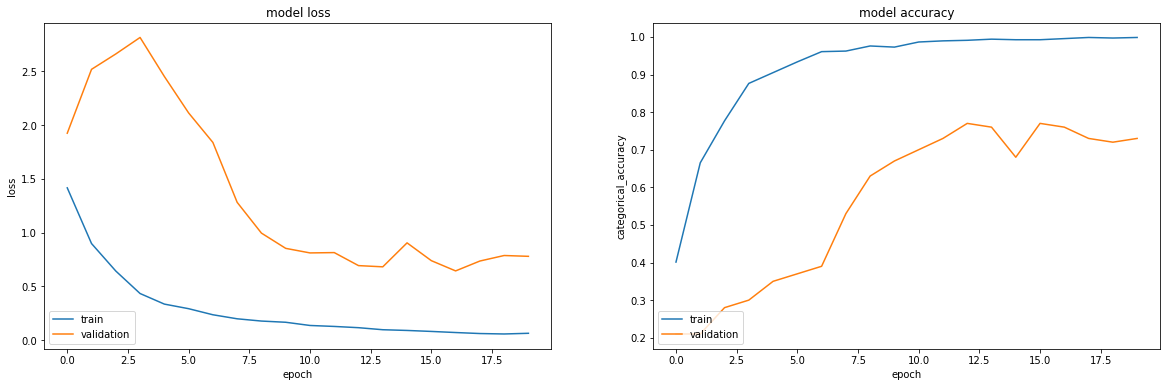

In [16]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(121)
ax1 = plt.plot(history.history['loss'])
ax1 = plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
ax2 = plt.subplot(122)
ax2 = plt.plot(history.history['categorical_accuracy'])
ax2 = plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')

This model certainly seems to overfit here.
Training Accuracy - 99.85
Validation Accuracy -  73.0

CNN2D + LSTM

In [17]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout, LSTM
from keras.layers.convolutional import Conv3D, MaxPooling3D, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import optimizers

model = Sequential()

model.add(TimeDistributed(Conv2D(16,(3,3),padding = 'same',activation='relu'),input_shape = input_shape))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(32,(3,3),padding = 'same',activation='relu'),input_shape = input_shape))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(64,(3,3),padding = 'same',activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(128,(3,3),padding = 'same',activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(256,(3,3),padding = 'same',activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Flatten()))

model.add(LSTM(256,return_sequences = False))
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5,activation='softmax'))

In [18]:
optimiser = optimizers.Adam(0.0001)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_16 (TimeDi  (None, 30, 120, 120, 16)  448      
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 30, 120, 120, 16)  64       
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, 30, 60, 60, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, 30, 60, 60, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_20 (TimeDi  (None, 30, 60, 60, 32)  

In [19]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [20]:
model_name = 'model_initCNN2DLSTM' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=2,cooldown=1,verbose=1)
callbacks_list = [checkpoint, LR]

In [21]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [22]:
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/arjun/Downloads/Project_data/train ; batch size = 10
Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 1.4412 - categorical_accuracy: 0.3937Source path =  /home/arjun/Downloads/Project_data/val ; batch size = 10

Epoch 1: saving model to model_initCNN2DLSTM_2022-09-1311_26_59.180547/model-00001-1.44118-0.39367-1.61582-0.21000.h5
67/67 [==============================] - 261s 4s/step - loss: 1.4412 - categorical_accuracy: 0.3937 - val_loss: 1.6158 - val_categorical_accuracy: 0.2100 - lr: 1.0000e-04
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 1.0738 - categorical_accuracy: 0.5716
Epoch 2: saving model to model_initCNN2DLSTM_2022-09-1311_26_59.180547/model-00002-1.07379-0.57164-1.62561-0.25000.h5
67/67 [==============================] - 263s 4s/step - loss: 1.0738 - categorical_accuracy: 0.5716 - val_loss: 1.6256 - val_categorical_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 3/20
67/67 [==============================] - ETA: 0s - lo


Epoch 20: ReduceLROnPlateau reducing learning rate to 3.12499992105586e-06.
67/67 [==============================] - 265s 4s/step - loss: 0.0977 - categorical_accuracy: 0.9879 - val_loss: 0.6498 - val_categorical_accuracy: 0.7300 - lr: 6.2500e-06


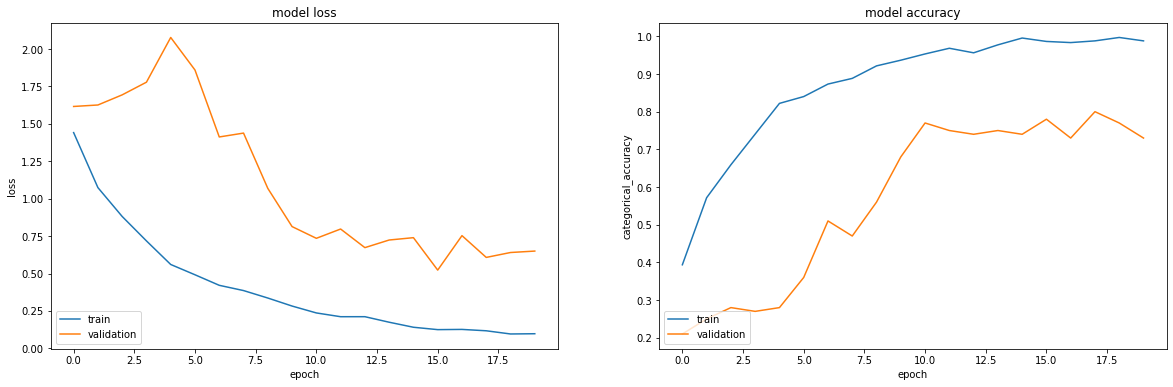

In [23]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(121)
ax1 = plt.plot(history.history['loss'])
ax1 = plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
ax2 = plt.subplot(122)
ax2 = plt.plot(history.history['categorical_accuracy'])
ax2 = plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')

The model still seems to overfit,  Training Accuracy - 98.79, Validation Accuracy - 73.00

CNN 3D

In [25]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout, LSTM
from keras.layers.convolutional import Conv3D, MaxPooling3D, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import optimizers

model = Sequential()

model.add(Conv3D(16,(3,3,3),padding = 'same',activation='relu',input_shape = input_shape))
model.add(BatchNormalization())
model.add(MaxPooling3D((2,2,2)))

model.add(Conv3D(32,(3,3,3),padding = 'same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D((2,2,2)))

model.add(Conv3D(64,(3,3,3),padding = 'same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D((2,2,2)))

model.add(Conv3D(128,(3,3,3),padding = 'same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D((2,2,2)))

model.add(Conv3D(256,(3,3,3),padding = 'same',activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(5,activation='softmax'))

In [26]:
optimiser = optimizers.Adam(0.0001)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_5 (Conv3D)           (None, 30, 120, 120, 16)  1312      
                                                                 
 batch_normalization_17 (Bat  (None, 30, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 15, 60, 60, 16)   0         
 3D)                                                             
                                                                 
 conv3d_6 (Conv3D)           (None, 15, 60, 60, 32)    13856     
                                                                 
 batch_normalization_18 (Bat  (None, 15, 60, 60, 32)   128       
 chNormalization)                                                
                                                      

In [27]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [28]:
model_name = 'model_initCNN3D' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=2,cooldown=1,verbose=1)
callbacks_list = [checkpoint, LR]

In [29]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [30]:
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/arjun/Downloads/Project_data/train ; batch size = 10
Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 1.6946 - categorical_accuracy: 0.4027Source path =  /home/arjun/Downloads/Project_data/val ; batch size = 10

Epoch 1: saving model to model_initCNN3D_2022-09-1311_26_59.180547/model-00001-1.69463-0.40271-2.08704-0.16000.h5
67/67 [==============================] - 690s 10s/step - loss: 1.6946 - categorical_accuracy: 0.4027 - val_loss: 2.0870 - val_categorical_accuracy: 0.1600 - lr: 1.0000e-04
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 0.9207 - categorical_accuracy: 0.6516 
Epoch 2: saving model to model_initCNN3D_2022-09-1311_26_59.180547/model-00002-0.92069-0.65158-3.33535-0.19000.h5
67/67 [==============================] - 691s 10s/step - loss: 0.9207 - categorical_accuracy: 0.6516 - val_loss: 3.3353 - val_categorical_accuracy: 0.1900 - lr: 1.0000e-04
Epoch 3/20
67/67 [==============================] - ETA: 0s - loss: 0

67/67 [==============================] - 736s 11s/step - loss: 0.1908 - categorical_accuracy: 0.9532 - val_loss: 0.7766 - val_categorical_accuracy: 0.7100 - lr: 3.1250e-06


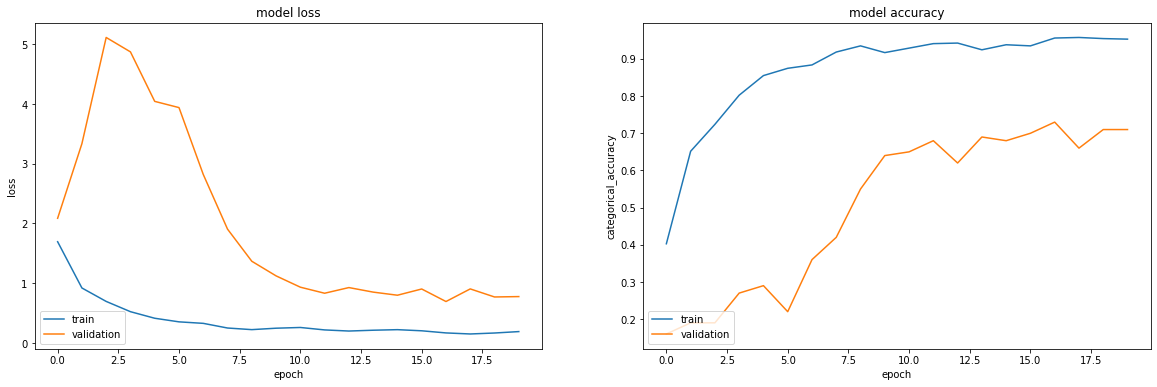

In [31]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(121)
ax1 = plt.plot(history.history['loss'])
ax1 = plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
ax2 = plt.subplot(122)
ax2 = plt.plot(history.history['categorical_accuracy'])
ax2 = plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')

# This model seem to overfit too.
# Training Accuracy - 95.32
# Validation Accuracy - 71.00

# CNN3D + l2 Regularizers

In [34]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout, LSTM
from keras.layers.convolutional import Conv3D, MaxPooling3D, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import optimizers
from keras.regularizers import l2

model = Sequential()

model.add(Conv3D(16,(3,3,3),padding = 'same',activation='relu',input_shape = input_shape))
model.add(BatchNormalization())
model.add(MaxPooling3D((2,2,2)))

model.add(Conv3D(32,(3,3,3),padding = 'same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D((2,2,2)))

model.add(Conv3D(64,(3,3,3),padding = 'same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D((2,2,2)))

model.add(Conv3D(128,(3,3,3),padding = 'same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D((2,2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu', kernel_regularizer = l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(5,activation='softmax'))

In [35]:
optimiser = optimizers.Adam(0.0001)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_10 (Conv3D)          (None, 30, 120, 120, 16)  1312      
                                                                 
 batch_normalization_24 (Bat  (None, 30, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_8 (MaxPooling  (None, 15, 60, 60, 16)   0         
 3D)                                                             
                                                                 
 conv3d_11 (Conv3D)          (None, 15, 60, 60, 32)    13856     
                                                                 
 batch_normalization_25 (Bat  (None, 15, 60, 60, 32)   128       
 chNormalization)                                                
                                                      

In [36]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [37]:
model_name = 'model_initCNN3DL2' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=2,cooldown=1,verbose=1)
callbacks_list = [checkpoint, LR]

In [38]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [39]:
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/arjun/Downloads/Project_data/train ; batch size = 10
Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 6.6188 - categorical_accuracy: 0.3409 Source path =  /home/arjun/Downloads/Project_data/val ; batch size = 10

Epoch 1: saving model to model_initCNN3DL2_2022-09-1311_26_59.180547/model-00001-6.61879-0.34087-6.93798-0.27000.h5
67/67 [==============================] - 721s 11s/step - loss: 6.6188 - categorical_accuracy: 0.3409 - val_loss: 6.9380 - val_categorical_accuracy: 0.2700 - lr: 1.0000e-04
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 5.9810 - categorical_accuracy: 0.5309 
Epoch 2: saving model to model_initCNN3DL2_2022-09-1311_26_59.180547/model-00002-5.98104-0.53092-7.94884-0.14000.h5
67/67 [==============================] - 721s 11s/step - loss: 5.9810 - categorical_accuracy: 0.5309 - val_loss: 7.9488 - val_categorical_accuracy: 0.1400 - lr: 1.0000e-04
Epoch 3/20
67/67 [==============================] - ETA: 0s - lo

67/67 [==============================] - 697s 10s/step - loss: 4.6951 - categorical_accuracy: 0.9276 - val_loss: 5.2580 - val_categorical_accuracy: 0.6900 - lr: 6.2500e-06


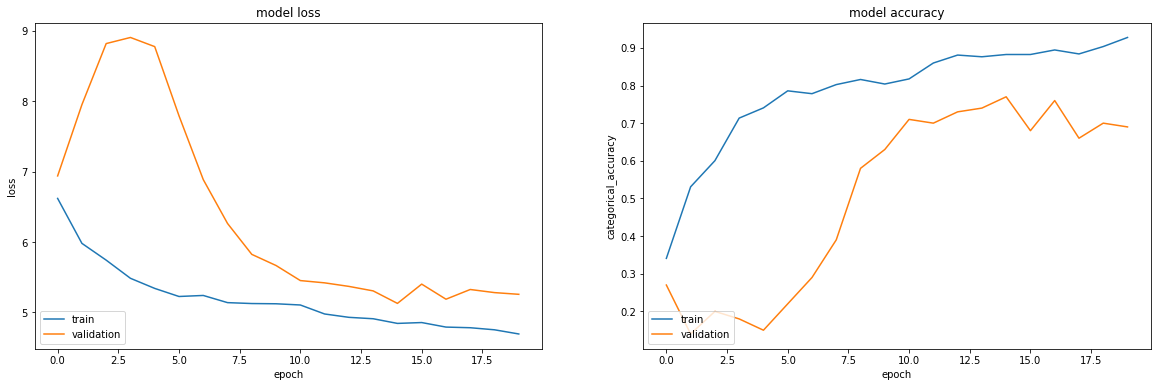

In [40]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(121)
ax1 = plt.plot(history.history['loss'])
ax1 = plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
ax2 = plt.subplot(122)
ax2 = plt.plot(history.history['categorical_accuracy'])
ax2 = plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')

The model seems to overfit a little 
Trainning Accuracy - 92.76
Validation Accuracy - 69.00

# CNN2D + LSTM (45 Epochs and SGD)

In [41]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout, LSTM
from keras.layers.convolutional import Conv3D, MaxPooling3D, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import optimizers

model = Sequential()

model.add(TimeDistributed(Conv2D(16,(3,3),padding = 'same',activation='relu'),input_shape = input_shape))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(32,(3,3),padding = 'same',activation='relu'),input_shape = input_shape))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(64,(3,3),padding = 'same',activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(128,(3,3),padding = 'same',activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(256,(3,3),padding = 'same',activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Flatten()))

model.add(LSTM(256,return_sequences = False))
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5,activation='softmax'))


In [42]:
optimiser = optimizers.SGD()
epochs = 45
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_32 (TimeDi  (None, 30, 120, 120, 16)  448      
 stributed)                                                      
                                                                 
 time_distributed_33 (TimeDi  (None, 30, 120, 120, 16)  64       
 stributed)                                                      
                                                                 
 time_distributed_34 (TimeDi  (None, 30, 60, 60, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_35 (TimeDi  (None, 30, 60, 60, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_36 (TimeDi  (None, 30, 60, 60, 32)  

In [43]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [44]:
model_name = 'model_initCNN2DLSTM_2' + '_1' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=2,cooldown=1,verbose=1)
callbacks_list = [checkpoint, LR]

In [45]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [46]:
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/arjun/Downloads/Project_data/train ; batch size = 10
Epoch 1/45
67/67 [==============================] - ETA: 0s - loss: 1.4797 - categorical_accuracy: 0.3363Source path =  /home/arjun/Downloads/Project_data/val ; batch size = 10

Epoch 1: saving model to model_initCNN2DLSTM_2_12022-09-1311_26_59.180547/model-00001-1.47970-0.33635-1.64413-0.21000.h5
67/67 [==============================] - 265s 4s/step - loss: 1.4797 - categorical_accuracy: 0.3363 - val_loss: 1.6441 - val_categorical_accuracy: 0.2100 - lr: 0.0100
Epoch 2/45
67/67 [==============================] - ETA: 0s - loss: 1.2014 - categorical_accuracy: 0.5038
Epoch 2: saving model to model_initCNN2DLSTM_2_12022-09-1311_26_59.180547/model-00002-1.20136-0.50377-1.88576-0.22000.h5
67/67 [==============================] - 269s 4s/step - loss: 1.2014 - categorical_accuracy: 0.5038 - val_loss: 1.8858 - val_categorical_accuracy: 0.2200 - lr: 0.0100
Epoch 3/45
67/67 [==============================] - ETA: 0s - loss


Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.
67/67 [==============================] - 274s 4s/step - loss: 0.1580 - categorical_accuracy: 0.9759 - val_loss: 0.6363 - val_categorical_accuracy: 0.7400 - lr: 6.2500e-04
Epoch 21/45
67/67 [==============================] - ETA: 0s - loss: 0.1445 - categorical_accuracy: 0.9729
Epoch 21: saving model to model_initCNN2DLSTM_2_12022-09-1311_26_59.180547/model-00021-0.14452-0.97285-0.60377-0.77000.h5
67/67 [==============================] - 303s 5s/step - loss: 0.1445 - categorical_accuracy: 0.9729 - val_loss: 0.6038 - val_categorical_accuracy: 0.7700 - lr: 3.1250e-04
Epoch 22/45
67/67 [==============================] - ETA: 0s - loss: 0.1483 - categorical_accuracy: 0.9698
Epoch 22: saving model to model_initCNN2DLSTM_2_12022-09-1311_26_59.180547/model-00022-0.14833-0.96983-0.58973-0.74000.h5

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.00015624999650754035.
67/67 [==============================] - 30


Epoch 39: ReduceLROnPlateau reducing learning rate to 1.220703097715159e-06.
67/67 [==============================] - 259s 4s/step - loss: 0.1414 - categorical_accuracy: 0.9759 - val_loss: 0.5417 - val_categorical_accuracy: 0.8200 - lr: 2.4414e-06
Epoch 40/45
67/67 [==============================] - ETA: 0s - loss: 0.1478 - categorical_accuracy: 0.9774
Epoch 40: saving model to model_initCNN2DLSTM_2_12022-09-1311_26_59.180547/model-00040-0.14781-0.97738-0.65726-0.76000.h5
67/67 [==============================] - 261s 4s/step - loss: 0.1478 - categorical_accuracy: 0.9774 - val_loss: 0.6573 - val_categorical_accuracy: 0.7600 - lr: 1.2207e-06
Epoch 41/45
67/67 [==============================] - ETA: 0s - loss: 0.1500 - categorical_accuracy: 0.9638
Epoch 41: saving model to model_initCNN2DLSTM_2_12022-09-1311_26_59.180547/model-00041-0.15005-0.96380-0.60617-0.76000.h5

Epoch 41: ReduceLROnPlateau reducing learning rate to 6.103515488575795e-07.
67/67 [==============================] - 260

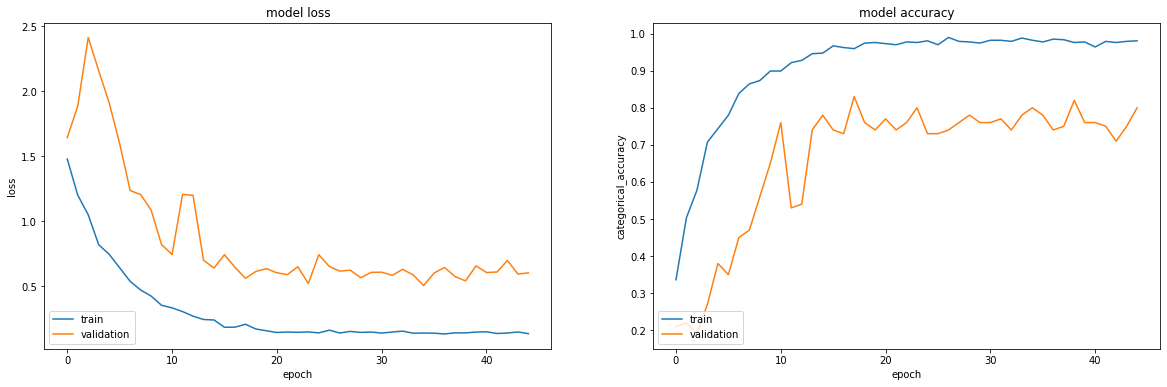

In [47]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(121)
ax1 = plt.plot(history.history['loss'])
ax1 = plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
ax2 = plt.subplot(122)
ax2 = plt.plot(history.history['categorical_accuracy'])
ax2 = plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')

This model does not seem to overfit, 
Training Accuracy - 98.04
Validation Accuracy - 80.00

# CNN2D + LSTM (45 Epochs and Adam)

In [48]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout, LSTM
from keras.layers.convolutional import Conv3D, MaxPooling3D, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import optimizers

model = Sequential()

model.add(TimeDistributed(Conv2D(16,(3,3),padding = 'same',activation='relu'),input_shape = input_shape))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(32,(3,3),padding = 'same',activation='relu'),input_shape = input_shape))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(64,(3,3),padding = 'same',activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(128,(3,3),padding = 'same',activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(256,(3,3),padding = 'same',activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Flatten()))

model.add(LSTM(256,return_sequences = False))
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5,activation='softmax'))

In [14]:
optimiser = optimizers.Adam(0.0001)
epochs = 45
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 30, 120, 120, 16)  448      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 30, 120, 120, 16)  64       
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 30, 60, 60, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 30, 60, 60, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 30, 60, 60, 32)   1

In [15]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [16]:
model_name = 'model_initCNN2DLSTM_2' + '_2' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=2,cooldown=1,verbose=1)
callbacks_list = [checkpoint, LR]

In [17]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [18]:
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/arjun/Downloads/Project_data/train ; batch size = 10
Epoch 1/45
67/67 [==============================] - ETA: 0s - loss: 0.4357 - categorical_accuracy: 0.8658
Epoch 1: saving model to model_initCNN2DLSTM_2_22022-09-1420_04_50.738367/model-00001-0.43568-0.86576-2.63569-0.34000.h5
67/67 [==============================] - 265s 4s/step - loss: 0.4357 - categorical_accuracy: 0.8658 - val_loss: 2.6357 - val_categorical_accuracy: 0.3400 - lr: 1.0000e-04
Epoch 2/45
67/67 [==============================] - ETA: 0s - loss: 0.2649 - categorical_accuracy: 0.9291
Epoch 2: saving model to model_initCNN2DLSTM_2_22022-09-1420_04_50.738367/model-00002-0.26491-0.92911-2.18656-0.41000.h5
67/67 [==============================] - 281s 4s/step - loss: 0.2649 - categorical_accuracy: 0.9291 - val_loss: 2.1866 - val_categorical_accuracy: 0.4100 - lr: 1.0000e-04
Epoch 3/45
67/67 [==============================] - ETA: 0s - loss: 0.1560 - categorical_accuracy: 0.9713
Epoch 3: saving model to

67/67 [==============================] - 260s 4s/step - loss: 0.0048 - categorical_accuracy: 1.0000 - val_loss: 0.8011 - val_categorical_accuracy: 0.7600 - lr: 6.2500e-06
Epoch 21/45
67/67 [==============================] - ETA: 0s - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 21: saving model to model_initCNN2DLSTM_2_22022-09-1420_04_50.738367/model-00021-0.00622-1.00000-0.78030-0.76000.h5

Epoch 21: ReduceLROnPlateau reducing learning rate to 3.12499992105586e-06.
67/67 [==============================] - 261s 4s/step - loss: 0.0062 - categorical_accuracy: 1.0000 - val_loss: 0.7803 - val_categorical_accuracy: 0.7600 - lr: 6.2500e-06
Epoch 22/45
67/67 [==============================] - ETA: 0s - loss: 0.0049 - categorical_accuracy: 1.0000
Epoch 22: saving model to model_initCNN2DLSTM_2_22022-09-1420_04_50.738367/model-00022-0.00487-1.00000-0.77082-0.78000.h5
67/67 [==============================] - 260s 4s/step - loss: 0.0049 - categorical_accuracy: 1.0000 - val_loss: 0.7708 - va


Epoch 39: ReduceLROnPlateau reducing learning rate to 1.2207030941624453e-08.
67/67 [==============================] - 262s 4s/step - loss: 0.0049 - categorical_accuracy: 1.0000 - val_loss: 0.8845 - val_categorical_accuracy: 0.7100 - lr: 2.4414e-08
Epoch 40/45
67/67 [==============================] - ETA: 0s - loss: 0.0040 - categorical_accuracy: 1.0000
Epoch 40: saving model to model_initCNN2DLSTM_2_22022-09-1420_04_50.738367/model-00040-0.00397-1.00000-0.77321-0.76000.h5
67/67 [==============================] - 260s 4s/step - loss: 0.0040 - categorical_accuracy: 1.0000 - val_loss: 0.7732 - val_categorical_accuracy: 0.7600 - lr: 1.2207e-08
Epoch 41/45
67/67 [==============================] - ETA: 0s - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 41: saving model to model_initCNN2DLSTM_2_22022-09-1420_04_50.738367/model-00041-0.00607-1.00000-0.77907-0.76000.h5

Epoch 41: ReduceLROnPlateau reducing learning rate to 6.103515470812226e-09.
67/67 [==============================] - 26

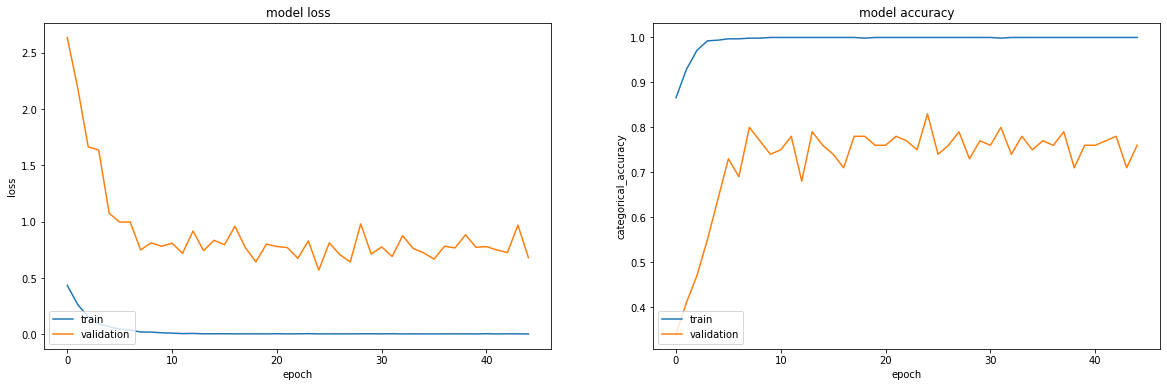

In [19]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(121)
ax1 = plt.plot(history.history['loss'])
ax1 = plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
ax2 = plt.subplot(122)
ax2 = plt.plot(history.history['categorical_accuracy'])
ax2 = plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')

Training Accuracy: 100.00%
Validation Accuracy: 76.00%

# Conclusion

After trying out multiple models, CNN2D + LSTM (45 Epochs and SGD) seems to be a better model in terms of Accuracy of Training and Validation and has comparitively less Training Loss. The selected checkpoint .h5 has been attached with the same.